In [20]:
import nltk # Using NLTK for ngrams analysis
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import os
import pandas as pd
import collections
import re
import seaborn as sns # For graphs

sw = stopwords.words("english")

In [4]:
textList = []
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        myfile = os.path.join(dirname, filename)
        with open(myfile, 'rb') as fopen:
            q = fopen.read().decode('ISO-8859-1')
            textList.append(q)
df = pd.DataFrame(textList)
df.columns = ['text']
df

,text
0,IP/QB.10 m.91.b. No. 44. (NEW SERIES.) SCIENTI...
1,IP/6/HG.s4. REPORT ON THE CALCUTTA MEDICAL INS...
2,"CHOLERA IN INDIA, 1862 TO 1881. BENGAL PROVINC..."
3,Vol. I 1931 THE Indian Journal of Veterinary S...
4,"IP/QB, 10 m.91.b No. 19. (NEW SERIES.) SCIENTI..."
...,...
463,[NLS note: a graphic appears here - see image ...
464,REPORT ON THE WORKING OF THE MENTAL HOSPITALS ...
465,ICAR. 15. VIII. 650 Vol. VIII 1938 THE Indian ...
466,SLEEPING SICKNESS A SUMMARY OF THE WORK DONE B...


In [21]:
def cleanTextInDf(mystring):
    mystring = mystring.lower() # Text normalization: make string lowercase
    mystring = re.sub(r'[^\w\s]','', mystring) # Text normalization: remove punctuation
    tokens = [token for token in nltk.word_tokenize(mystring) if token not in sw] # Include stop words
    return " ".join(tokens)

cleanText = lambda text: cleanTextInDf(text) # Lambda function applies to all cells in a column
cleandf = pd.DataFrame(df.text.apply(cleanText)) # .apply() the function to all cells
df = cleandf

In [10]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:40]

<AxesSubplot:>

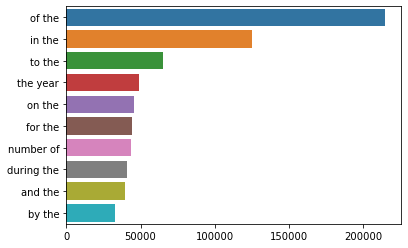

In [11]:
top_n_bigrams=get_top_ngram(df['text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

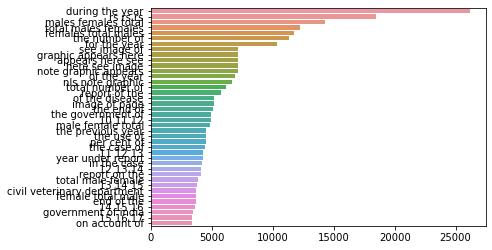

In [12]:
top_tri_grams=get_top_ngram(df['text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

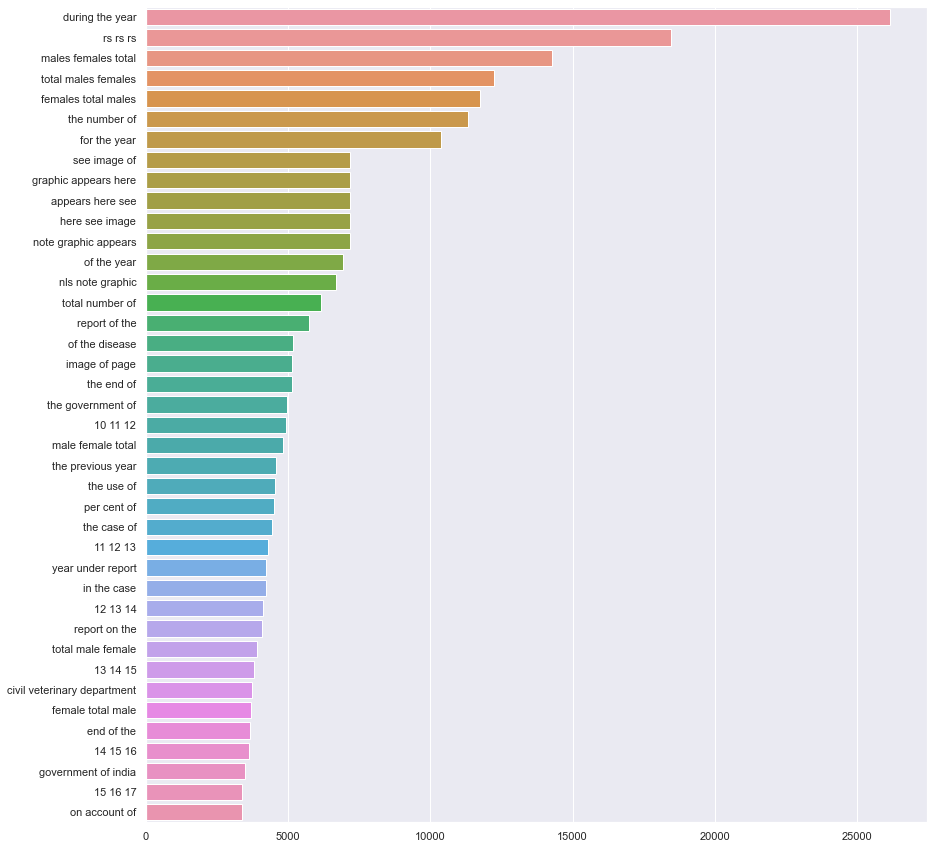

In [15]:
sns.set(rc={'figure.figsize':(14,15)})
sns.barplot(x=y,y=x)

In [18]:
# nltk.download('stopwords') # Download stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tashfeen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<AxesSubplot:>

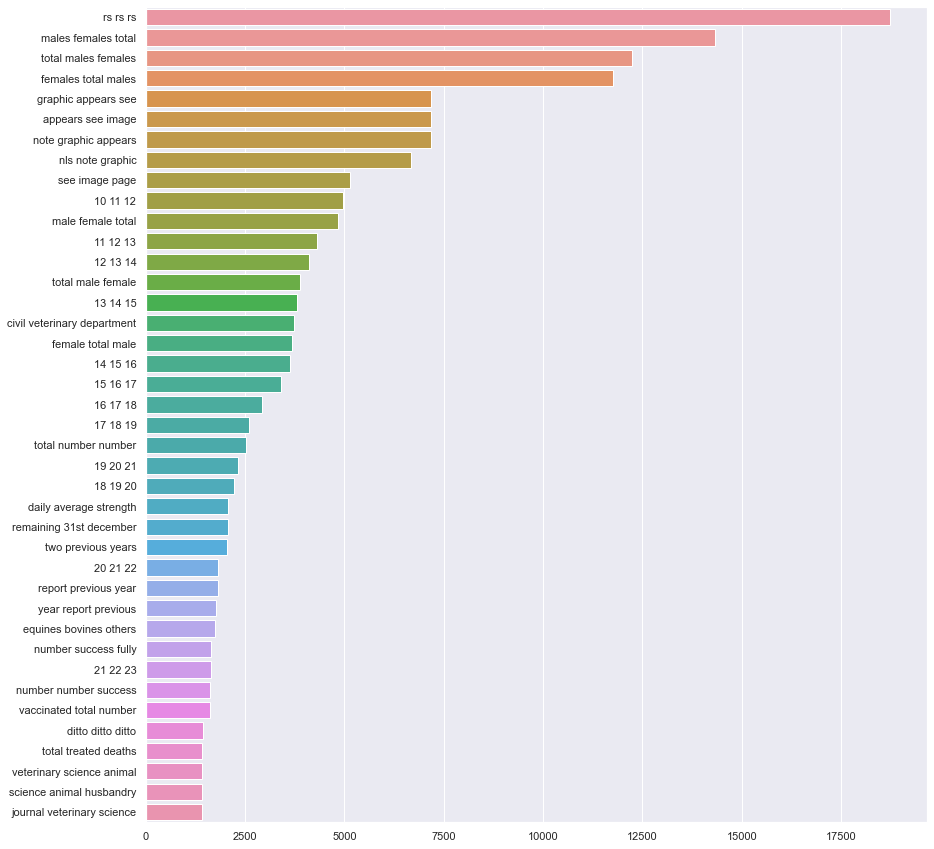

In [22]:
top_tri_grams=get_top_ngram(df['text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.set(rc={'figure.figsize':(14,15)})
sns.barplot(x=y,y=x)

<AxesSubplot:>

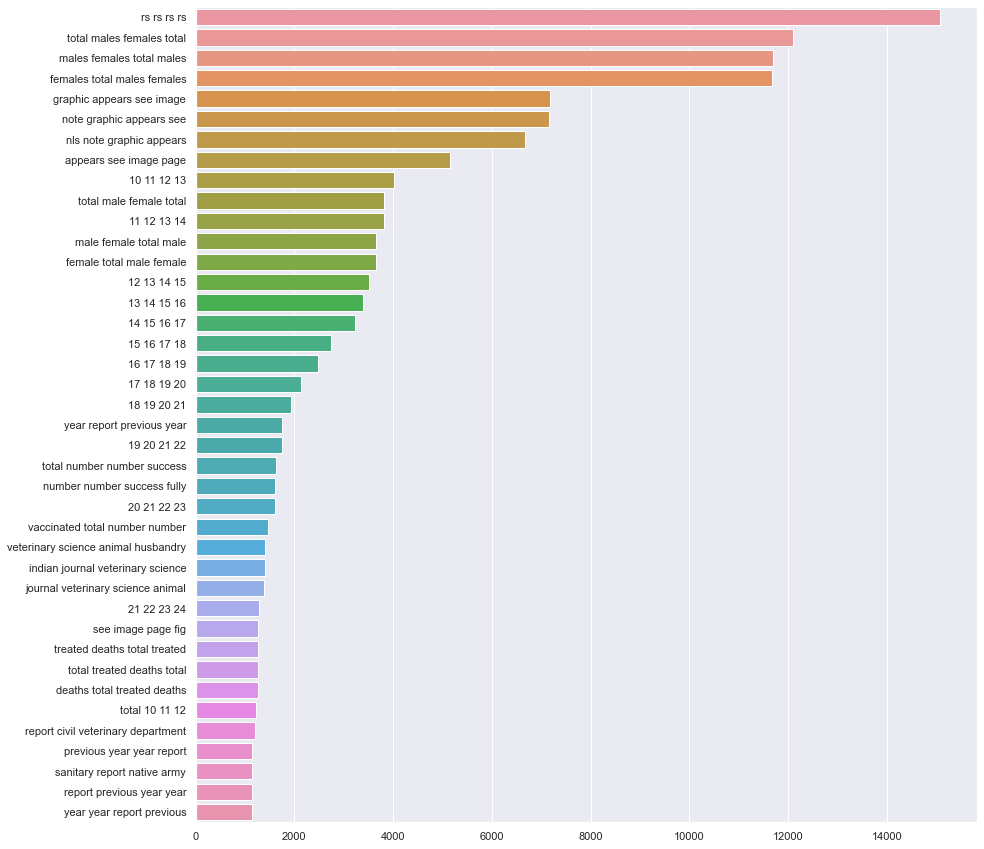

In [23]:
top_quad_grams=get_top_ngram(df['text'],n=4)
x,y=map(list,zip(*top_quad_grams))
sns.set(rc={'figure.figsize':(14,15)})
sns.barplot(x=y,y=x)